In [207]:
# Load data
import numpy as np

''' 
kmnist-[train/test]-[images/labels].npz: These files contain the
Kuzushiji-MNIST as compressed numpy arrays, and can be read with:

arr = np.load(filename)['arr_0']. We recommend using these files to
load the dataset.
'''

X_train = np.load("archive/kmnist-train-imgs.npz")["arr_0"]
y_train = np.load("archive/kmnist-train-labels.npz")["arr_0"]

X_test = np.load("archive/kmnist-test-imgs.npz")["arr_0"]
y_test = np.load("archive/kmnist-test-labels.npz")["arr_0"] 

In [208]:
# Check dimensions
# 232365 grayscale images with dimensions 28x28 for training
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')

# 38547 grayscale images with dimensions 28x28 for testing
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


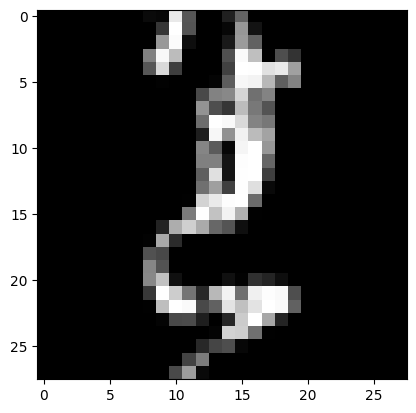

In [209]:
# Plot dataset
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.get_cmap("gray"))
plt.show()

In [210]:
# Reshape training and test images to be processed into ANN
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

X_train, val_images = X_train[10000:], X_train[:10000]
y_train, val_labels = y_train[10000:], y_train[:10000]

In [211]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        '''
        Gives details about the logs for an epoch. Each log gives an accuracy value and if its about 95%, we stop training
        by saying "self.model.stop_training = True"

        :param epoch: a given epoch run
        :param logs: a numerical value of the accuracy
        :return: None
        '''
        if (logs.get('accuracy') > 0.95):
            print("\nReached 95% accuracy! Cancelling training!")
            self.model.stop_training = True

In [295]:
# Build model
import keras
from keras import layers

def ANN():
    model = keras.Sequential(layers=[
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(units=64, activation="relu"),
        layers.Dense(units=128, activation="relu"),
        layers.Dense(units=10, activation="softmax")
    ])

    return model

model = ANN()
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_40 (Flatten)        (None, 784)               0         
                                                                 
 dense_91 (Dense)            (None, 64)                50240     
                                                                 
 dense_92 (Dense)            (None, 128)               8320      
                                                                 
 dense_93 (Dense)            (None, 10)                1290      
                                                                 
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


In [296]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [297]:
history = model.fit(X_train, y_train, 
                    epochs=20,
                    batch_size=256,
                    validation_data=(val_images, val_labels))

Epoch 1/20


196/196 [==============================] - 1s 3ms/step - loss: 0.7054 - accuracy: 0.7907 - val_loss: 0.4025 - val_accuracy: 0.8798
Epoch 2/20
196/196 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.8950 - val_loss: 0.3160 - val_accuracy: 0.9073
Epoch 3/20
196/196 [==============================] - 0s 2ms/step - loss: 0.2723 - accuracy: 0.9193 - val_loss: 0.2677 - val_accuracy: 0.9190
Epoch 4/20
196/196 [==============================] - 0s 3ms/step - loss: 0.2253 - accuracy: 0.9343 - val_loss: 0.2341 - val_accuracy: 0.9299
Epoch 5/20
196/196 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 0.9428 - val_loss: 0.2174 - val_accuracy: 0.9352
Epoch 6/20
196/196 [==============================] - 0s 3ms/step - loss: 0.1676 - accuracy: 0.9506 - val_loss: 0.2070 - val_accuracy: 0.9404
Epoch 7/20
196/196 [==============================] - 0s 2ms/step - loss: 0.1470 - accuracy: 0.9574 - val_loss: 0.2043 - val_accuracy: 0.9409
Epoch 8/20
196/19

In [298]:
test_loss, test_acc = model.evaluate(x=X_test, y=y_test)
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 0s 885us/step - loss: 0.5581 - accuracy: 0.8857
Test Accuracy: 0.885699987411499


In [303]:
prediction = model.predict(x=X_test)
classes = np.argmax(prediction, axis=1)




313/313 [==============================] - 0s 965us/step


array([[1.7296104e-05, 1.8905608e-06, 9.9822062e-01, ..., 1.4967947e-05,
        1.3428509e-05, 3.4888981e-05],
       [6.1072118e-04, 8.5193487e-03, 2.1204330e-02, ..., 1.3458726e-02,
        5.5792504e-03, 5.9886437e-02],
       [4.5460977e-09, 5.0087982e-07, 1.5319212e-05, ..., 2.0333464e-05,
        6.2257078e-07, 4.1271619e-08],
       ...,
       [1.6545760e-13, 2.7387270e-09, 3.3799064e-11, ..., 7.2788233e-13,
        8.5763611e-15, 1.0000000e+00],
       [4.6427760e-04, 3.1459576e-06, 1.0872885e-02, ..., 5.5732977e-01,
        3.0670251e-09, 1.1103069e-06],
       [7.1982154e-06, 4.6191425e-07, 9.8800313e-01, ..., 4.7783766e-07,
        3.6032000e-04, 1.8066292e-05]], dtype=float32)

In [300]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

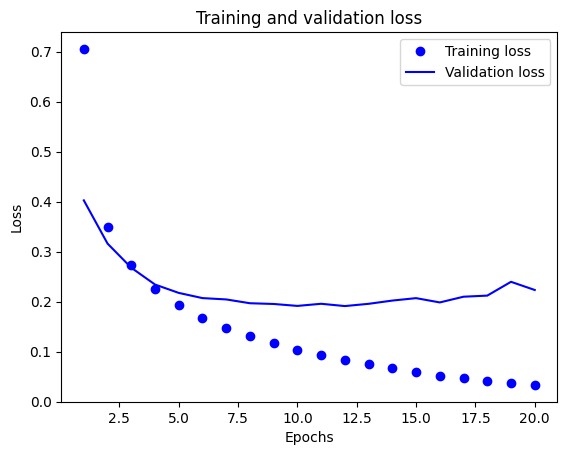

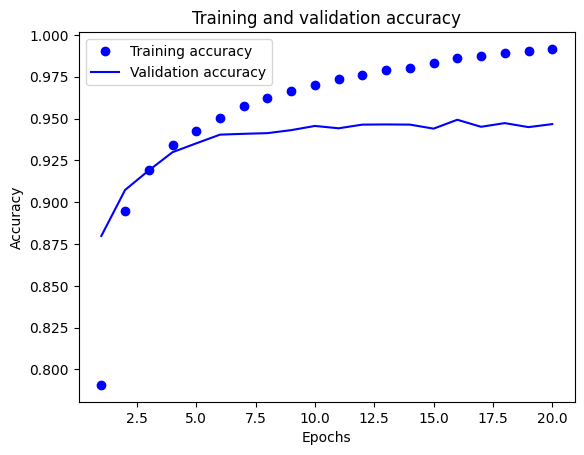

In [301]:
# Plotting training and validation loss
def plot_loss_graph(history):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]

    epochs = range(1, len(loss_values) + 1)

    plt.plot(epochs, loss_values, "bo", label="Training loss")
    plt.plot(epochs, val_loss_values, "b", label="Validation loss") 

    plt.title("Training and validation loss")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    plt.legend()

    plt.show()

# Plotting training and validation loss
def plot_acc_graph(history):
    history_dict = history.history
    accuracy_values = history_dict["accuracy"]
    val_accuracy_values = history_dict["val_accuracy"]

    epochs = range(1, len(accuracy_values) + 1)

    plt.plot(epochs, accuracy_values, "bo", label="Training accuracy")
    plt.plot(epochs, val_accuracy_values, "b", label="Validation accuracy") 

    plt.title("Training and validation accuracy")

    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")

    plt.legend()

    plt.show()

plot_loss_graph(history)
plot_acc_graph(history)

## Using a CNN model